In [1]:
# Install packages in this notebook
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn matplotlib rdkit mordred -q

# Import all libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib


In [3]:
df_mordred= pd.read_csv("./data/AqSolDB_descriptors_imputed.csv")

In [4]:
X = df_mordred.iloc[:, 5:]  # columns after first 5 are Mordred descriptors  # All Mordred descriptors
y = df_mordred['LogS']  # Solubility values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

Features shape: (6674, 1536)
Target shape: (6674,)


In [7]:
print(f"Training: {X_train.shape[0]} molecules")
print(f"Testing: {X_test.shape[0]} molecules")

Training: 5339 molecules
Testing: 1335 molecules


In [6]:
# Create model with optimized parameters
model_rf = RandomForestRegressor(
    n_estimators=100,      # 100 trees
    max_depth=30,          # Tree depth
    min_samples_split=5,   # Min samples to split
    min_samples_leaf=2,    # Min samples at leaf
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

print("Training model...")
model_rf.fit(X_train, y_train)

print("Training complete!")

Training model...
Training complete!


In [8]:
# Predict on training set
y_pred_train = model_rf.predict(X_train)

# Predict on test set
y_pred_test = model_rf.predict(X_test)

print("Predictions made!")
print(f"\nFirst 5 test predictions:")
print(f"{'Actual':<12} {'Predicted':<12} {'Error':<10}")
print("-" * 35)
for i in range(5):
    actual = y_test.iloc[i]
    pred = y_pred_test[i]
    error = abs(actual - pred)
    print(f"{actual:<12.3f} {pred:<12.3f} {error:<10.3f}")


Predictions made!

First 5 test predictions:
Actual       Predicted    Error     
-----------------------------------
-5.658       -3.963       1.695     
-3.130       -3.080       0.050     
-4.470       -5.952       1.482     
-1.346       -0.985       0.361     
-0.075       -0.272       0.196     


In [ ]:
print("MODEL EVALUATION")
print("=" * 60)

# Training metrics
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)

# Test metrics
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\n TRAINING SET:")
print(f"  R² Score:  {train_r2:.4f}")
print(f"  RMSE:      {train_rmse:.4f}")
print(f"  MAE:       {train_mae:.4f}")

print(f"\n TEST SET (Most Important!):")
print(f"  R² Score:  {test_r2:.4f}")
print(f"  RMSE:      {test_rmse:.4f}")
print(f"  MAE:       {test_mae:.4f}")

# Check for overfitting
gap = train_r2 - test_r2
print(f"\n OVERFITTING CHECK:")
print(f"  Train R² - Test R²: {gap:.4f}")
if gap < 0.05:
    print(f"  Good generalization!")
elif gap < 0.15:
    print(f"  Slight overfitting")
else:
    print(f"   Significant overfitting")

MODEL EVALUATION

 TRAINING SET:
  R² Score:  0.9700
  RMSE:      0.3900
  MAE:       0.2653

 TEST SET (Most Important!):
  R² Score:  0.8325
  RMSE:      0.8924
  MAE:       0.6348

 OVERFITTING CHECK:
  Train R² - Test R²: 0.1375
  Slight overfitting


visualizations...
Plot saved as 'random_forest_results.png'


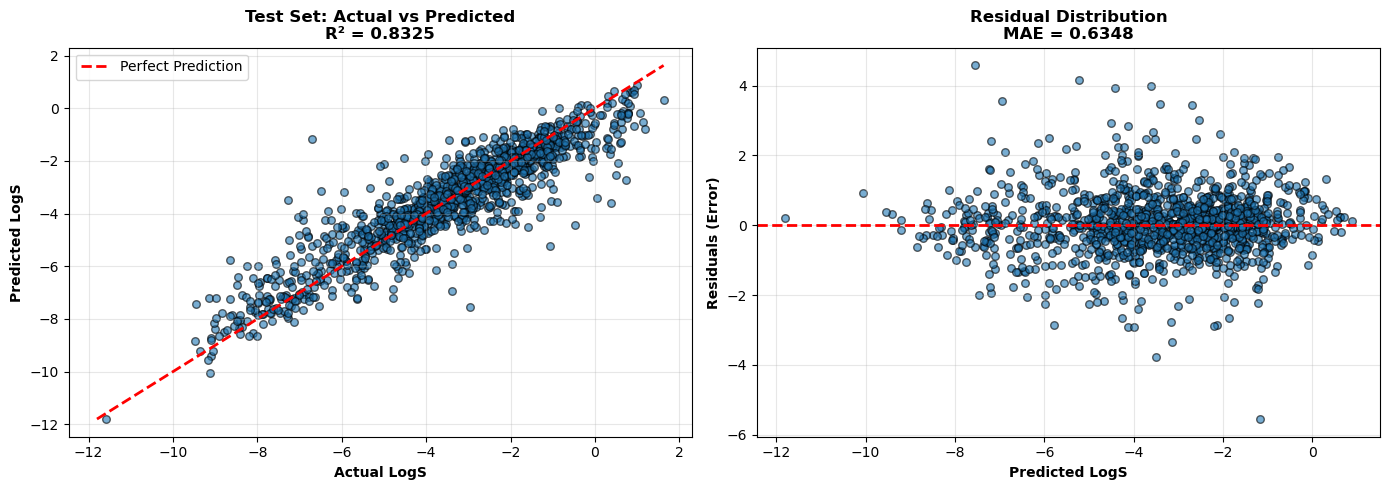

In [ ]:
print("visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_test, y_pred_test, alpha=0.6, edgecolors='k', s=30)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual LogS', fontweight='bold')
axes[0].set_ylabel('Predicted LogS', fontweight='bold')
axes[0].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_pred_test
axes[1].scatter(y_pred_test, residuals, alpha=0.6, edgecolors='k', s=30)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted LogS', fontweight='bold')
axes[1].set_ylabel('Residuals (Error)', fontweight='bold')
axes[1].set_title(f'Residual Distribution\nMAE = {test_mae:.4f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
print("Saving trained model...")

# Save model
joblib.dump(model_rf, 'random_forest_model.pkl')

print("Model saved as 'random_forest_model.pkl'")

Saving trained model...
Model saved as 'random_forest_model.pkl'
Results saved as 'results_summary.json'
